The goal of this notebook is to help Adventure works predict customer average monthly spend given the customer info, bike buyer and available average month spend data. This is a regression problem and we will explore various ML Regressors. We shall first perform needed data clean up and visualization, tuning, data balance and analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
# loading .csv dataset files
customer_info = pd.read_csv('dataset/input/AdvWorksCusts.csv')
customer_spending = pd.read_csv('dataset/input/AW_AveMonthSpend.csv')
customer_has_bike= pd.read_csv('dataset/input/AW_BikeBuyer.csv')

In [3]:
# display current customer_info shape 
print(customer_info.shape)
print(customer_info.CustomerID.unique().shape)

(16421, 23)
(16404,)


In [4]:
# remove duplicates then display new customer_info shape
customer_info.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(customer_info.shape)
print(customer_info.CustomerID.unique().shape)

(16404, 23)
(16404,)


In [5]:
# display current customer_spending shape 
print(customer_spending.shape)
print(customer_spending.CustomerID.unique().shape)

(16421, 2)
(16404,)


In [6]:
# remove duplicates then display new customer_spending shape
customer_spending.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(customer_spending.shape)
print(customer_spending.CustomerID.unique().shape)

(16404, 2)
(16404,)


In [7]:
# display current customer_has_bike shape 
print(customer_has_bike.shape)
print(customer_has_bike.CustomerID.unique().shape)

(16408, 2)
(16404,)


In [8]:
# remove duplicates then display new customer_has_bike shape
customer_has_bike.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(customer_has_bike.shape)
print(customer_has_bike.CustomerID.unique().shape)

(16404, 2)
(16404,)


Checking for any missing values in the dataset files

In [9]:
# Checking customer_has_bike dataset
(customer_has_bike.astype(np.object).isnull()).any()

CustomerID    False
BikeBuyer     False
dtype: bool

In [10]:
# Checking customer_spending dataset
(customer_spending.astype(np.object).isnull()).any()

CustomerID       False
AveMonthSpend    False
dtype: bool

In [11]:
# Checking customer_info dataset
(customer_info.astype(np.object).isnull()).any()


CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

An exploratory data analysis will now be carried out.

In [12]:
customer_info.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [13]:
customer_spending.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.392892
std,5340.370705,27.270023
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [14]:
customer_has_bike.describe()

,CustomerID,BikeBuyer
count,16404.000000,16404.000000
mean,20240.143136,0.332541
std,5340.370705,0.471138
min,11000.000000,0.000000
25%,15617.750000,0.000000
50%,20231.500000,0.000000
75%,24862.250000,1.000000
max,29482.000000,1.000000


The customer_info and customer_spending dataset will be merged together for analysis.
This will be used to determine the customers average monthly spend. 

In [15]:
combined = customer_info
combined = customer_info.merge(customer_spending, on='CustomerID', how='right')
combined.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [16]:
# We will get the customers age from the time of when the data was gathered.
from datetime import datetime

def get_age(customer_info, date_format):
    date_gathered = datetime.strptime("01/01/1998", date_format)
    age = []
    for index, row in customer_info.iterrows():
        convert = datetime.strptime(row['BirthDate'], date_format)
        age.append(int((date_gathered - convert).days/365.25))
    return age

In [17]:
combined['Age'] = get_age(combined, '%d/%m/%Y')

In [18]:
combined[['CustomerID', 'BirthDate','Age']].head()

,CustomerID,BirthDate,Age
0,11000,08/04/1966,31
1,11001,14/05/1965,32
2,11002,12/08/1965,32
3,11003,15/02/1968,29
4,11004,08/08/1968,29


Plotting scatter plots to see relationships between other numeric features and AveMonthSpend

In [19]:
def plot_scatter(auto_prices, col_x, col_y = 'AveMonthSpend'):
    for col in col_x:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


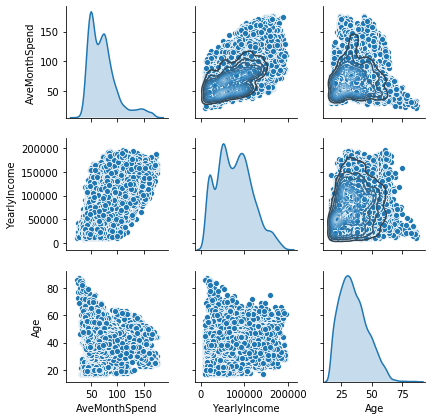

In [20]:
col_x = ['AveMonthSpend','YearlyIncome','Age']
sns.pairplot(combined[col_x],  palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")

From the scatter plots for YearlyIncome and Age there is some relationship with AveMonthSpend. These might be good features.

Will make use of box plots to take a look at the categorical variables to AveMonthSpend

In [21]:
def plot_box(auto_prices, col_x, col_y = 'AveMonthSpend'):
    for col in col_x:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

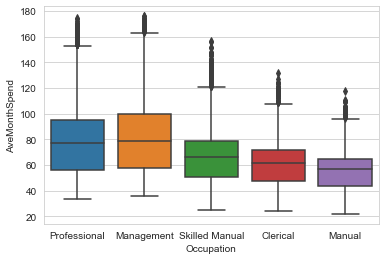

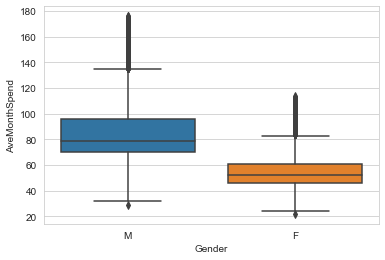

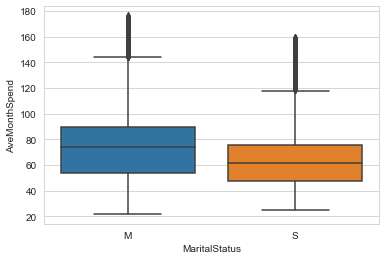

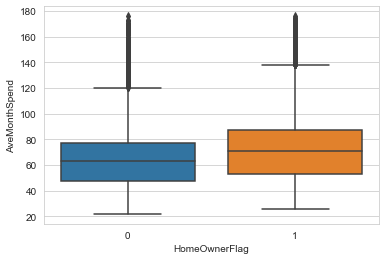

In [22]:
col_x = ['Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag']
plot_box(combined, col_x)

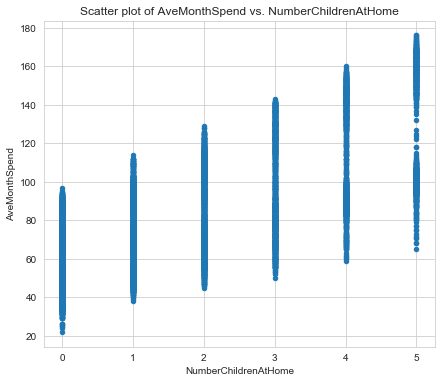

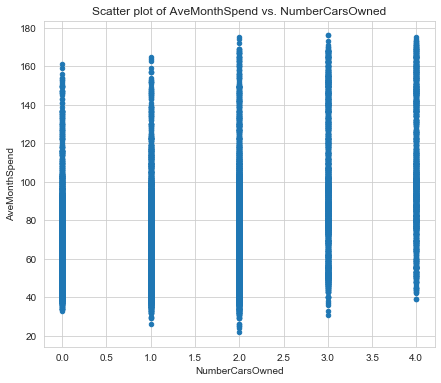

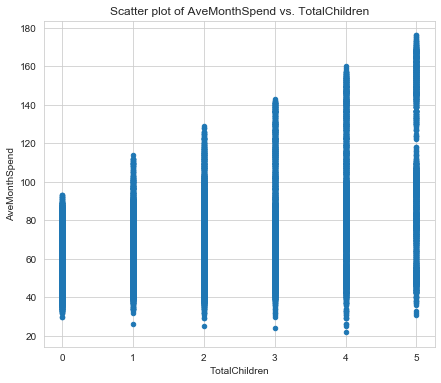

In [23]:
plot_scatter(combined, ['NumberChildrenAtHome', 'NumberCarsOwned', 'TotalChildren'])

Categorical features such as occupation, gender, marital status and home owner flag have distinct relationships with average month spend. The quartiles are of different levels. 
It seems that Males spend more on average than females same for married and homeowners.
Numeric features of interest would be Number of children at home, age and yearly income(as seen earlier).

In [24]:
categorical_features = ['Gender','MaritalStatus','HomeOwnerFlag', 'Occupation']
numeric_features = ['Age', 'YearlyIncome','NumberChildrenAtHome']

Now it is time to prepare the data for training.
1. We will be doing one-hot encoding for categorical variables.
2. Converting features to numpy arrays for scikit learn ML library.

In [25]:
# define encoder for categorical variables
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [26]:
def encode_cat_features(features):
    categorical_features = ['Gender','MaritalStatus','HomeOwnerFlag']
    f = encode_string(features['Occupation'])
    for cat in categorical_features:
        enc = encode_string(features[cat])
        f = np.concatenate([f,enc],1)
    return f

In [27]:
labels = np.array(combined.AveMonthSpend)
print(labels)

[ 89 117 123 ...  48  65  72]


In [28]:
selected = numeric_features + categorical_features
features = combined[selected]
features.head()

,Age,YearlyIncome,NumberChildrenAtHome,Gender,MaritalStatus,HomeOwnerFlag,Occupation
0,31,137947,0,M,M,1,Professional
1,32,101141,3,M,S,0,Professional
2,32,91945,3,M,M,1,Professional
3,29,86688,0,F,S,0,Professional
4,29,92771,5,F,S,1,Professional


In [29]:
encoded = encode_cat_features(features)
encoded[:,:]

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence t

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [30]:
numeric_features = np.array(combined[numeric_features])
numeric_features[:,:]

array([[    31, 137947,      0],
       [    32, 101141,      3],
       [    32,  91945,      3],
       ...,
       [    37,  60417,      0],
       [    37,  66653,      0],
       [    38,  59736,      0]])

In [31]:
features = np.concatenate([encoded,numeric_features], 1)
print(features.shape)
print(features[:1,:14])

(16404, 14)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 3.10000e+01
  1.37947e+05 0.00000e+00]]


In [32]:
# Time to split and train
nr.seed(9988)
indx = range(features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:2,11:13]

array([[6.40000e+01, 6.16210e+04],
       [5.40000e+01, 1.18286e+05]])

In [33]:
# Time to scale, this would most especially be useful in yearly income
scaler = preprocessing.StandardScaler().fit(X_train[:,11:13])
X_train[:,11:13] = scaler.transform(X_train[:,11:13])
X_test[:,11:13] = scaler.transform(X_test[:,11:13])
X_train[:2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  2.54140814, -0.41709616,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.65148342,  1.00791474,  0.        ]])

Feautres are now prepared.

First of lets train with a simple linear regression

In [34]:
## define and fit the linear regression model
lin_mod = linear_model.Ridge(alpha = 0.04)
lin_mod.fit(X_train, y_train)
print(lin_mod.intercept_)
print(lin_mod.coef_)

60.84666680912588
[ 6.90222629e-01 -2.14727259e+00 -2.38350962e-01  8.98653031e-01
  7.96747896e-01 -1.40815692e+01  1.40815692e+01  3.10495110e+00
 -3.10495110e+00  1.00711588e-02 -1.00711589e-02 -1.25114521e+00
  8.17521102e+00  1.10798078e+01]


In [35]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 14) 

Mean Square Error      = 34.42067937315792
Root Mean Square Error = 5.866913956515633
Mean Absolute Error    = 4.31838082135484
Median Absolute Error  = 3.47731040269829
R^2                    = 0.9512934642209426
Adjusted R^2           = 0.94907953077644


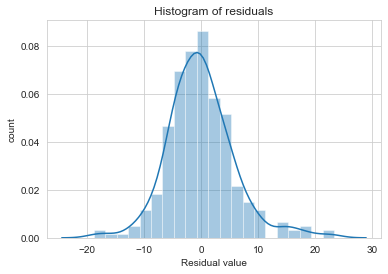

In [36]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)   

In [37]:
print(y_test[14])
print(y_score[14])
start = indx[1][14] -1
print(combined[start:indx[1][14]])

67
70.35122587079823
       CustomerID Title FirstName MiddleName LastName Suffix  \
10653       23010   NaN      Seth        NaN     Cook    NaN   

              AddressLine1 AddressLine2   City StateProvinceName  ...  \
10653  7352 Mt. Wilson Pl.          NaN  Sooke  British Columbia  ...   

      Occupation Gender MaritalStatus HomeOwnerFlag NumberCarsOwned  \
10653   Clerical      M             S             1               2   

      NumberChildrenAtHome TotalChildren YearlyIncome  AveMonthSpend  Age  
10653                    0             0        42870             61   19  

[1 rows x 25 columns]


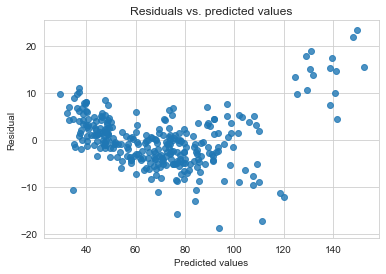

In [38]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
resid_plot(y_test, y_score)

Residual vs predicted values does not look great, there seems to be a pattern for lower AveMonthSpend even if residuals are of deceptively normal distribution. This signals that the model might not generalize well. The RMSE is also not great.

In [39]:
# trying polynomial regression 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(4),
                           linear_model.LinearRegression())
poly_model.fit(X_train,y_train)
scores = poly_model.predict(X_test) 
print_metrics(y_test, scores, 14) 

Mean Square Error      = 8.306603547229122
Root Mean Square Error = 2.8821178926666273
Mean Absolute Error    = 2.3581770833333335
Median Absolute Error  = 2.098325729370117
R^2                    = 0.9882458484189285
Adjusted R^2           = 0.987711568801607


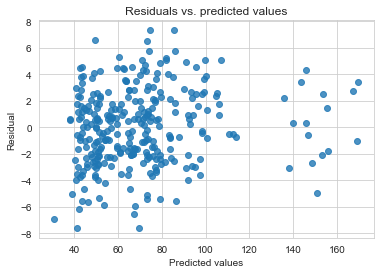

In [40]:
resid_plot(y_test, scores)

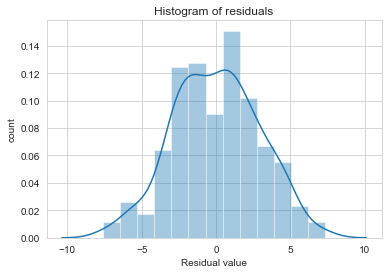

In [41]:
hist_resids(y_test, scores)   

In [42]:
print(y_test)
print(scores)

[ 56  38  43  82  80  39  73  69  88  44  83  72  75  55  67  40  73  98
  79  73  61  79  67  78  61  43  93  48  54  51  48  60  46  96  67  58
  83  54 108  68  75  56  42 135  62  93  48  58  76  91  72  48  54  46
  65  62  47 146  39  62  46  57  58 157  60  45  73  64  54  72  59  24
  74  47 151  94  87 100  46  74  79  74  67  42  40  90  53  79  71  58
  74  84  40  39  74 146  47  77  52  81  41  70  68  72  59  50  58  63
  67  52  47  67 154 102  96  48  51  87  87  64  82  46 150  44  71  51
  48  65 102  83 112  34 168  98  88 107  70  87  54  38  53  83  71  70
  47  46  64  53  46  98  63  82  59  55  50  52  43  64  57 140  77  71
  48 138  75 113  95  60  48  62  89  72  78  72  44  41 146  71 146  51
  46  41  82  39  46  81  64 103  77  58  46  76  93  52  49  76 100  50
  75  46  66  44 173  95  43  75 101  87  64  51  68  77 107  72  59  43
  79 105  64  61  51  72 170  80  66  68  65  75 112  49  82  56  92  74
  44 108  48  53  57  53  76  77  63  45  50  68  5

Using polynomial features performs much better than linear regression. The RMSE is down by an order of a magnitude. The R2 and Adjusted R2 signify a good residual distribution as evidenced on the residual scatter plot and histogram.

In [43]:
# trying Neural network 
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100,),  
                                    activation='logistic',
                                       learning_rate='adaptive',
                                       max_iter=1000,
                                       learning_rate_init=0.001)
regressor.fit(X_train,y_train)
scores = regressor.predict(X_test)
print_metrics(y_test, scores, 14) 

Mean Square Error      = 8.307674702948624
Root Mean Square Error = 2.882303714556921
Mean Absolute Error    = 2.3604818622947694
Median Absolute Error  = 2.11382426328127
R^2                    = 0.9882443326939246
Adjusted R^2           = 0.9877099841800121


In [44]:
# trying Random Forest
from sklearn.ensemble import RandomForestRegressor
rand_regressor = RandomForestRegressor(n_estimators=40)
rand_regressor.fit(X_train, y_train)
scores = rand_regressor.predict(X_test)
print_metrics(y_test, scores, 14) 

Mean Square Error      = 12.288691666666665
Root Mean Square Error = 3.5055230232686627
Mean Absolute Error    = 2.827833333333333
Median Absolute Error  = 2.575000000000003
R^2                    = 0.9826110462884396
Adjusted R^2           = 0.9818206393015505


Random forest even if better in RMSE than LinearRegression the RandomForestR

In [45]:
# test on final test data
# import final test data
final = pd.read_csv('dataset/input/AW_test.csv')
print(final.shape)
print(final.CustomerID.unique().shape)

(500, 23)
(500,)


In [46]:
final['Age'] = get_age(final,'%m/%d/%Y')
final[['Age','BirthDate']].head()

,Age,BirthDate
0,52,1/5/1945
1,33,10/4/1964
2,63,1/12/1934
3,39,9/22/1958
4,32,3/19/1965


In [47]:
encoded = encode_cat_features(final)
encoded[:,:]

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence t

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [48]:
numeric_final_features = np.array(final[['Age','YearlyIncome', 'NumberChildrenAtHome']])
numeric_final_features[:1,:]

array([[   52, 86931,     0]])

In [49]:
final_test = np.concatenate([encoded,numeric_final_features], 1)
final_test[:,11:13]= scaler.transform(final_test[:,11:13])
final_test[:3,:14]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  1.47349848,  0.21939949,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        , -0.21735847,  0.55120208,  2.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  2.45241567,  0.64827332,  0.        ]])

In [50]:
final_reg_scores = rand_regressor.predict(final_test)
np.savetxt('dataset/output/results/regression_results.csv', final_reg_scores, delimiter=',',fmt='%i')